In [1]:
import torch
import numpy as np
import random
import torch.nn as nn
import torch.nn.functional as F
import itertools
import pdb
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

import sys

sys.path.insert(0, './src')

from data import Dataset
from kernels import HMC_our
from models import Gen_network, Inf_network
from target import NN_bernoulli
from utils import plot_digit_samples, get_samples
from args import get_args

In [2]:
torchType = torch.float32

In [3]:
def set_seeds(rand_seed):
#     torch.cuda.manual_seed_all(rand_seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    torch.manual_seed(rand_seed)
    np.random.seed(rand_seed)
    random.seed(rand_seed)

seed = 1 # 1337 #
set_seeds(seed)

In [4]:
args = get_args()

In [5]:
encoder = Inf_network(kwargs=args).to(args.device)
target = NN_bernoulli(kwargs=args, model=Gen_network(args.z_dim, args), device=args.device).to(args.device)

if args.amortize:
    transitions = HMC_our(kwargs=args).to(args.device)
else:
    transitions = nn.ModuleList([HMC_our(kwargs=args).to(args.device) for _ in range(args['K'])])

params = [encoder.parameters(), target.parameters(), transitions.parameters()]
optimizer = torch.optim.Adam(params=itertools.chain(*params))

In [6]:
dataset = Dataset(args, device=args.device)

In [7]:
random_code = args.std_normal.sample((64, args.z_dim))

  0%|          | 0/400 [00:00<?, ?it/s]

On batch number 1/100 and on k = 1 we have for  0: 0.48800002317875624 and for +1: 0.5120000243186951
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 1 	 Current ELBO: -256.91253662109375
Saved samples to ./pics/mnist_epoch_0_K_1_N_3_amortize_True.png


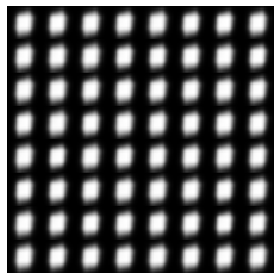

  0%|          | 1/400 [00:15<1:40:02, 15.04s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5480000260286033 and for +1: 0.452000021468848
Stepsize 0.10020109021293279
Autoregression coeff 0.5248510837554932
Current epoch: 2 	 Current ELBO: -252.13653564453125
Saved samples to ./pics/mnist_epoch_1_K_1_N_3_amortize_True.png


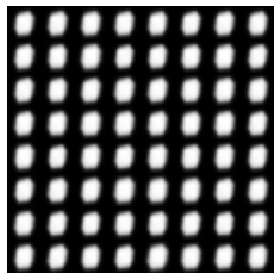

  0%|          | 2/400 [00:29<1:39:22, 14.98s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.4760000226087868 and for +1: 0.5240000248886645
Stepsize 0.09865246141912003
Autoregression coeff 0.5488044619560242
Current epoch: 3 	 Current ELBO: -249.6281280517578
Saved samples to ./pics/mnist_epoch_2_K_1_N_3_amortize_True.png


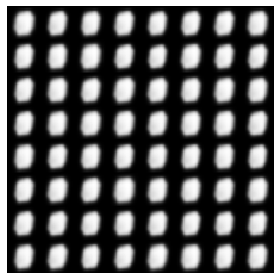

  1%|          | 3/400 [00:44<1:38:50, 14.94s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5180000246036798 and for +1: 0.48200002289377153
Stepsize 0.09752425884042977
Autoregression coeff 0.5720478296279907
Current epoch: 4 	 Current ELBO: -250.9170684814453
Saved samples to ./pics/mnist_epoch_3_K_1_N_3_amortize_True.png


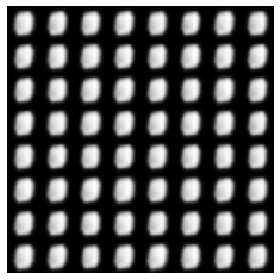

  1%|          | 4/400 [00:59<1:38:22, 14.91s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5040000239387155 and for +1: 0.49600002355873585
Stepsize 0.09705325301461717
Autoregression coeff 0.5941693782806396
Current epoch: 5 	 Current ELBO: -237.76907348632812
Saved samples to ./pics/mnist_epoch_4_K_1_N_3_amortize_True.png


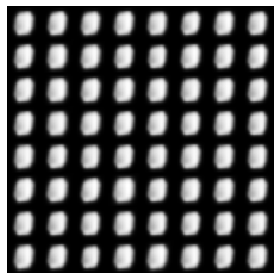

  1%|▏         | 5/400 [01:14<1:37:59, 14.88s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5080000241287053 and for +1: 0.49200002336874604
Stepsize 0.09605613183948879
Autoregression coeff 0.6156792044639587
Current epoch: 6 	 Current ELBO: -239.83941650390625
Saved samples to ./pics/mnist_epoch_5_K_1_N_3_amortize_True.png


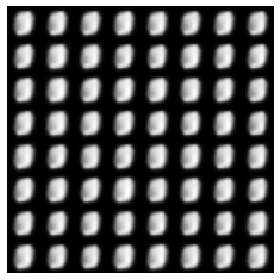

  2%|▏         | 6/400 [01:29<1:37:37, 14.87s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.4500000213738531 and for +1: 0.5500000261235982
Stepsize 0.09607738684444447
Autoregression coeff 0.6360726952552795
Current epoch: 7 	 Current ELBO: -236.58250427246094
Saved samples to ./pics/mnist_epoch_6_K_1_N_3_amortize_True.png


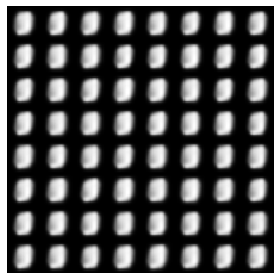

  2%|▏         | 7/400 [01:44<1:37:18, 14.86s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5000000237487257 and for +1: 0.5000000237487257
Stepsize 0.0949319513233717
Autoregression coeff 0.6555056571960449
Current epoch: 8 	 Current ELBO: -235.2678985595703
Saved samples to ./pics/mnist_epoch_7_K_1_N_3_amortize_True.png


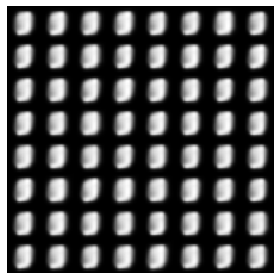

  2%|▏         | 8/400 [01:58<1:37:00, 14.85s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.48400002298876643 and for +1: 0.5160000245086849
Stepsize 0.09391722920930677
Autoregression coeff 0.6738770604133606
Current epoch: 9 	 Current ELBO: -246.60716247558594
Saved samples to ./pics/mnist_epoch_8_K_1_N_3_amortize_True.png


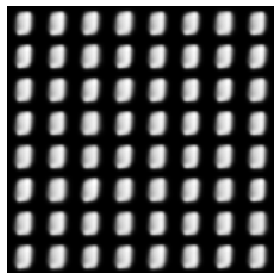

  2%|▏         | 9/400 [02:13<1:36:44, 14.85s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5080000241287053 and for +1: 0.49200002336874604
Stepsize 0.09368370679867338
Autoregression coeff 0.6913477778434753
Current epoch: 10 	 Current ELBO: -230.2764434814453
Saved samples to ./pics/mnist_epoch_9_K_1_N_3_amortize_True.png


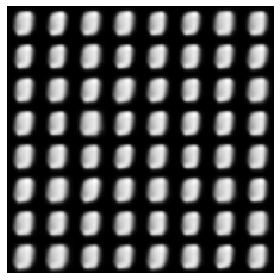

  2%|▎         | 10/400 [02:28<1:36:28, 14.84s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.4800000227987766 and for +1: 0.5200000246986747
Stepsize 0.09216383597154094
Autoregression coeff 0.7077797651290894
Current epoch: 11 	 Current ELBO: -231.25738525390625
Saved samples to ./pics/mnist_epoch_10_K_1_N_3_amortize_True.png


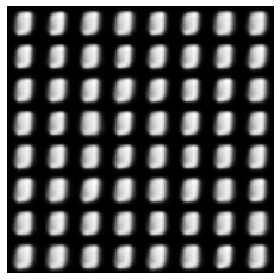

  3%|▎         | 11/400 [02:43<1:36:15, 14.85s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5100000242237002 and for +1: 0.49000002327375114
Stepsize 0.09177782386723064
Autoregression coeff 0.7233482003211975
Current epoch: 12 	 Current ELBO: -227.67169189453125
Saved samples to ./pics/mnist_epoch_11_K_1_N_3_amortize_True.png


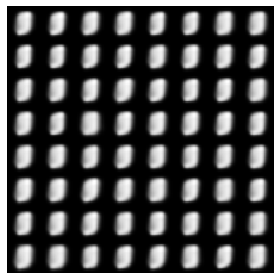

  3%|▎         | 12/400 [02:58<1:35:58, 14.84s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.49400002346374094 and for +1: 0.5060000240337104
Stepsize 0.09127240049755315
Autoregression coeff 0.7382103204727173
Current epoch: 13 	 Current ELBO: -223.68128967285156
Saved samples to ./pics/mnist_epoch_12_K_1_N_3_amortize_True.png


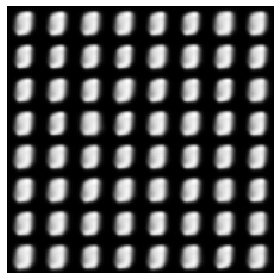

  3%|▎         | 13/400 [03:13<1:35:42, 14.84s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.49000002327375114 and for +1: 0.5100000242237002
Stepsize 0.09108564276588171
Autoregression coeff 0.7520580887794495
Current epoch: 14 	 Current ELBO: -221.83306884765625
Saved samples to ./pics/mnist_epoch_13_K_1_N_3_amortize_True.png


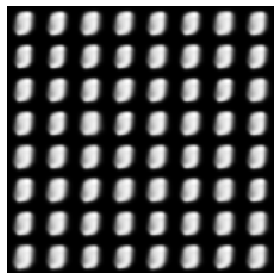

  4%|▎         | 14/400 [03:27<1:35:26, 14.84s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.4680000222288072 and for +1: 0.5320000252686441
Stepsize 0.09016582508002847
Autoregression coeff 0.7650638222694397


In [ ]:
print_info_ = 1

torch_log_2 = torch.tensor(np.log(2.), device=args.device, dtype=args.torchType)


def compute_loss(z_new, p_new, u, p_old, x, sum_log_alpha, sum_log_jac, sum_log_sigma):
    log_p = target.get_logdensity(z=z_new, x=x) + args.std_normal.log_prob(p_new).sum(1)
    log_r = -args.K * torch_log_2
    log_m = args.std_normal.log_prob(u).sum(1) + args.std_normal.log_prob(p_old).sum(1) - sum_log_jac - sum_log_sigma + sum_log_alpha
    elbo_full = log_p + log_r - log_m
    grad_elbo = torch.mean(elbo_full + elbo_full.detach() * sum_log_alpha)
    return elbo_full, grad_elbo
  
# with torch.autograd.detect_anomaly():
for ep in tqdm(range(args.num_epoches)): # cycle over epoches
    for b_num, batch_train in enumerate(dataset.next_train_batch()): # cycle over batches

        cond_vectors = [args.std_normal.sample((args.z_dim, )) for _ in range(args.K)]
        optimizer.zero_grad()

        mu, sigma = encoder(batch_train) # sample mu and sigma from encoder
        u = args.std_normal.sample(mu.shape) # sample random tensor for reparametrization trick
        z = mu + sigma * u # reperametrization trick
        p_old = args.std_normal.sample(mu.shape)

        sum_log_alpha = torch.zeros(mu.shape[0], dtype=args.torchType, device=args.device) # for grad log alpha accumulation
        sum_log_jacobian = torch.zeros(mu.shape[0], dtype=args.torchType, device=args.device) # for log_jacobian accumulation
        sum_log_sigma = torch.sum(torch.log(sigma), 1)
        p = p_old
        for k in range(args.K):
            # sample alpha - transition probabilities 
            if args.amortize:
                z, p, log_jac, current_log_alphas, directions, _ = transitions.make_transition(q_old=z, x=batch_train,
                                                    p_old=p, k=cond_vectors[k], target_distr=target)
            else:
                z, p, log_jac, current_log_alphas, directions, _ = transitions[k].make_transition(q_old=z, x=batch_train,
                                                                    p_old=p, k=cond_vectors[k], target_distr=target) # sample a_i -- directions

            if ep  % print_info_ == 0 and b_num % (100 * print_info_) == 0:
                print('On batch number {}/{} and on k = {} we have for  0: {} and for +1: {}'.format(b_num + 1,
                                                                        dataset.train.shape[0] // args['train_batch_size'],
                                                                           k + 1,
                                                    (directions==0.).to(float).mean(),
                                                                    (directions==1.).to(float).mean()))
                if args.amortize:
                    print('Stepsize {}'.format(np.exp(transitions.gamma.cpu().detach().item())))
                    print('Autoregression coeff {}'.format(torch.sigmoid(transitions.alpha_logit).cpu().detach().item()))
            # Accumulate alphas
            sum_log_alpha = sum_log_alpha + current_log_alphas
            sum_log_jacobian = sum_log_jacobian + log_jac  # refresh log jacobian

        elbo_full, grad_elbo = compute_loss(z_new=z, p_new=p, u=u, p_old=p_old, x=batch_train, sum_log_alpha=sum_log_alpha,
                                            sum_log_jac=sum_log_jacobian, sum_log_sigma=sum_log_sigma)
    #     pdb.set_trace()
        (-grad_elbo).backward()
        optimizer.step()
        optimizer.zero_grad()
        # Bias squared
    if ep % print_info_ == 0:
        print('Current epoch:', (ep + 1), '\t', 'Current ELBO:', elbo_full.detach().mean().item())
        plot_digit_samples(samples=get_samples(target.decoder, random_code), args=args, epoch=ep)